In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize_and_evaluate(dataset_name, data, labels, num_centers, model):
    fig = plt.figure(figsize=(6,6), dpi=90)
    plt.scatter(data[:, 0], data[:, 1], s=3, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.title(f'{dataset_name} with shape: {data.shape} and K: {num_centers}')
    plt.grid()
    plt.show()
    
    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'Estimated K             : {model.K}')
    print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

## 2-dimenisonal cases

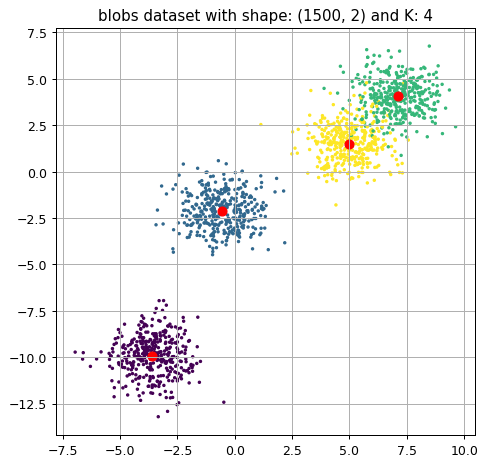

Estimated K             : 4
Silhouette score        : 0.6415096733621566
Random Index score      : 0.935738650821945
Completeness score      : 0.9276944531071666
Mutual Information score: 0.9275372019209517


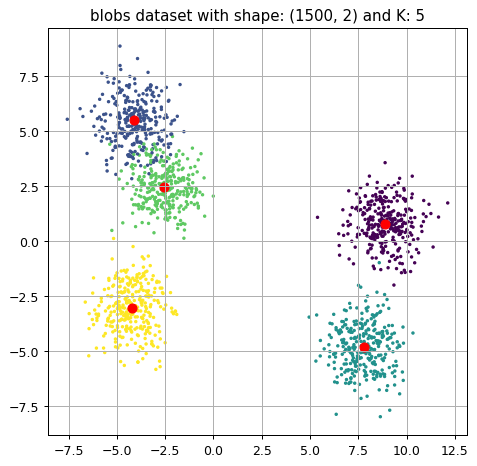

Estimated K             : 5
Silhouette score        : 0.6208738756620013
Random Index score      : 0.9477133726613343
Completeness score      : 0.9459123438216805
Mutual Information score: 0.9456891786795941


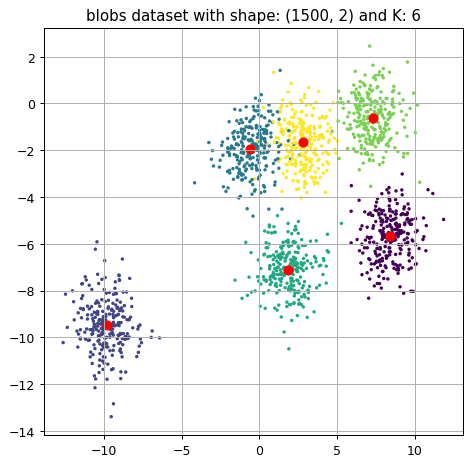

Estimated K             : 6
Silhouette score        : 0.6245484329538988
Random Index score      : 0.9565539454277341
Completeness score      : 0.9524314167205868
Mutual Information score: 0.9521246908975707


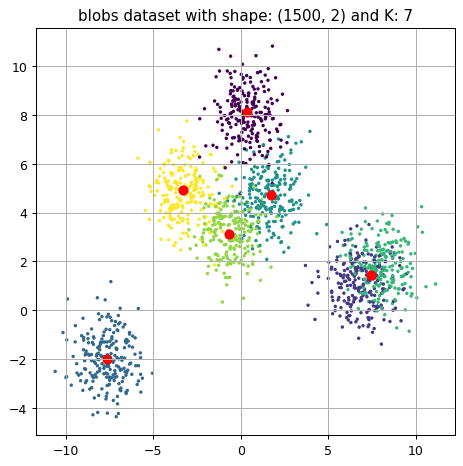

Estimated K             : 6
Silhouette score        : 0.5744358982228964
Random Index score      : 0.7517625682037706
Completeness score      : 0.8862361472260241
Mutual Information score: 0.8377002810222954


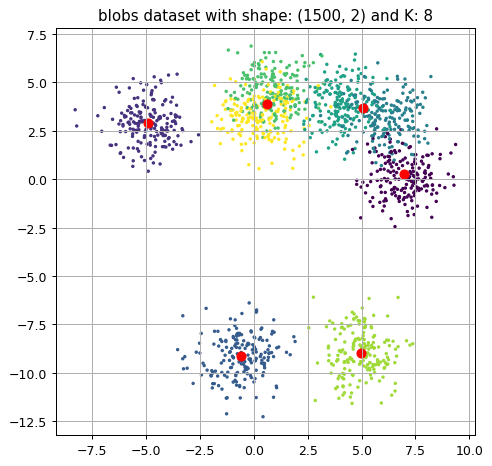

Estimated K             : 6
Silhouette score        : 0.5650845417351607
Random Index score      : 0.70247441067472
Completeness score      : 0.9176568049332398
Mutual Information score: 0.8359284604422368


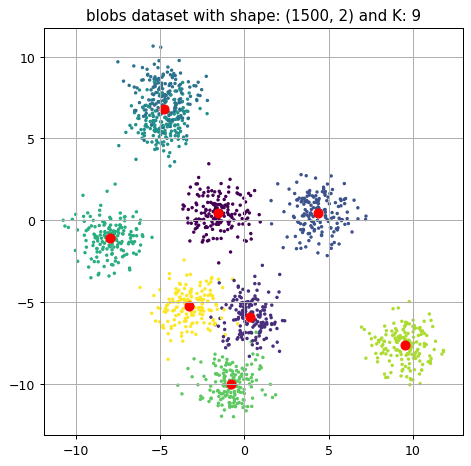

Estimated K             : 8
Silhouette score        : 0.6600783367063704
Random Index score      : 0.8663658326292002
Completeness score      : 0.9780945845730354
Mutual Information score: 0.9419597326980704


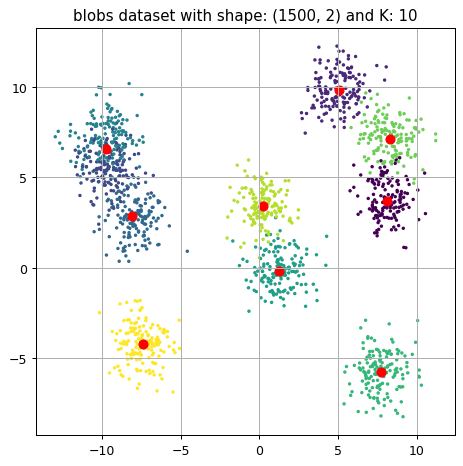

Estimated K             : 9
Silhouette score        : 0.5787611981938908
Random Index score      : 0.8435387497178382
Completeness score      : 0.9417903570508229
Mutual Information score: 0.9133818491092964


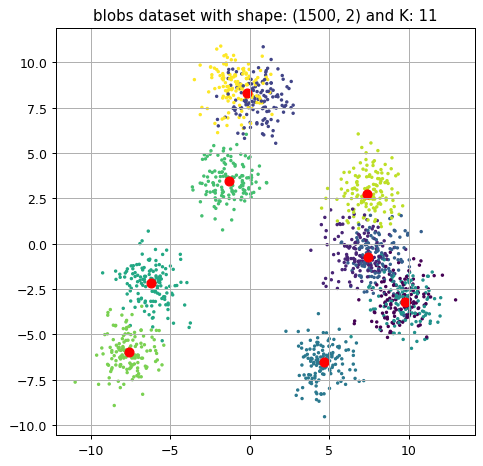

Estimated K             : 8
Silhouette score        : 0.5530491349371038
Random Index score      : 0.6986599799767281
Completeness score      : 0.922211315652756
Mutual Information score: 0.8433085561325819


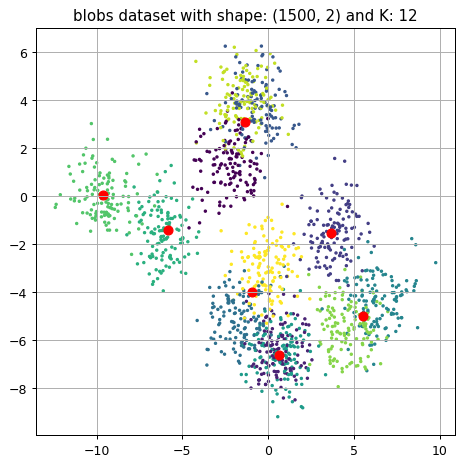

Estimated K             : 7
Silhouette score        : 0.49096567146671155
Random Index score      : 0.5602982908727469
Completeness score      : 0.8911436402985145
Mutual Information score: 0.7650139775646875


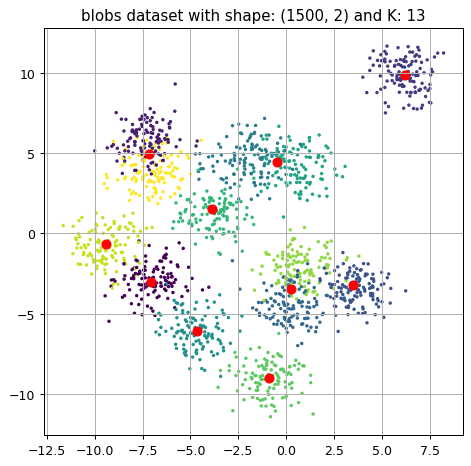

Estimated K             : 10
Silhouette score        : 0.5151339337246912
Random Index score      : 0.7217996792506145
Completeness score      : 0.9118232209994629
Mutual Information score: 0.852406178965282


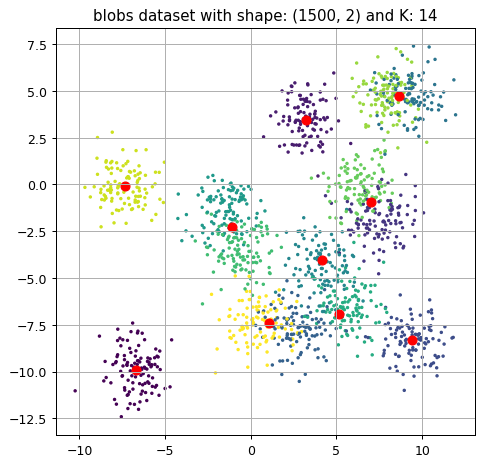

Estimated K             : 10
Silhouette score        : 0.547653876240137
Random Index score      : 0.679349440367292
Completeness score      : 0.9098451435875314
Mutual Information score: 0.8364072400078802


In [4]:
# blob datasets
for num_centers in range(4, 15):
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, n_features=2, cluster_std=1)
    model = XMeans(K_max=20, identical_spherical_normal_distributions=False).fit(data)
    visualize_and_evaluate('blobs dataset', data, labels, num_centers, model)

## unnecessary split case

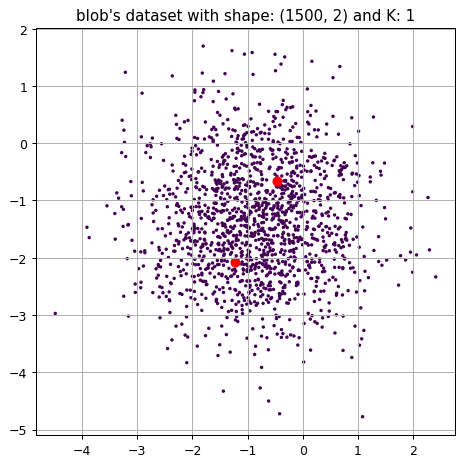

Estimated K             : 2
Silhouette score        : 0.3100812984715061
Random Index score      : 0.0
Completeness score      : 0.0
Mutual Information score: 0.0


In [5]:
num_centers = 1
data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, n_features=2, cluster_std=1)
model = XMeans(K_init=2, identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("blob's dataset", data, labels, num_centers, model)

## high dimensional case in 2D snapshot

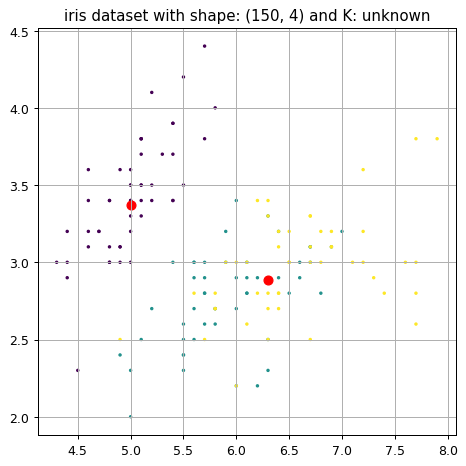

Estimated K             : 2
Silhouette score        : 0.681046169211746
Random Index score      : 0.5399218294207123
Completeness score      : 0.8835142349190769
Mutual Information score: 0.6538380713762779

note that data is in 4 dimension and the plot is only a 2D snapshot along the first 2 axes


In [6]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target
model = XMeans(identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("iris dataset", data, labels, 'unknown', model)
print(f'\nnote that data is in {data.shape[1]} dimension and the plot is only a 2D snapshot along the first 2 axes')